IMPLEMENTATION OF BASIC RNN ARCHITECTURE 

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

The code first imports the necessary modules from Keras, including the MNIST dataset, the Sequential model, the SimpleRNN layer, the Dense layer, and the to_categorical function for converting class vectors to binary class matrices.

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Next, the code loads the MNIST dataset and normalizes the pixel values to the range [0, 1]. The training and test sets are also converted to binary class matrices using the to_categorical function.

In [ ]:
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

After that, the code defines the RNN model using the Sequential API. The model contains one SimpleRNN layer with 128 units and an input shape of (28, 28) corresponding to the shape of each MNIST image. The output layer is a dense layer with softmax activation that outputs a probability distribution over the 10 classes.

In [ ]:
# Define RNN model
model = Sequential()
model.add(SimpleRNN(units=128, input_shape=(28, 28)))
model.add(Dense(num_classes, activation='softmax'))

The code then compiles the model using categorical cross-entropy loss and the Adam optimizer. The model is also evaluated based on accuracy.

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

The model is trained for 10 epochs with a batch size of 128 using the fit method, with the test set used for validation.

In [ ]:
# Train model
batch_size = 128
epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.4412 - acc: 0.8656

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 18s 302us/sample - loss: 0.4411 - acc: 0.8657 - val_loss: 0.2071 - val_acc: 0.9370
Epoch 2/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.1906 - acc: 0.9427 - val_loss: 0.1758 - val_acc: 0.9461
Epoch 3/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.1479 - acc: 0.9565 - val_loss: 0.1575 - val_acc: 0.9509
Epoch 4/10
60000/60000 [==============================] - 17s 287us/sample - loss: 0.1235 - acc: 0.9634 - val_loss: 0.1142 - val_acc: 0.9655
Epoch 5/10
60000/60000 [==============================] - 18s 292us/sample - loss: 0.1103 - acc: 0.9676 - val_loss: 0.1185 - val_acc: 0.9677
Epoch 6/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.1072 - acc: 0.9682 - val_loss: 0.1161 - val_acc: 0.9657
Epoch 7/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0990 - acc: 0.9705 - val_loss: 0.0987 - val_acc: 0.9709
Epoch 8/10
60000/60000 [

Finally, the model is evaluated on the test set and the test loss and accuracy are printed.

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


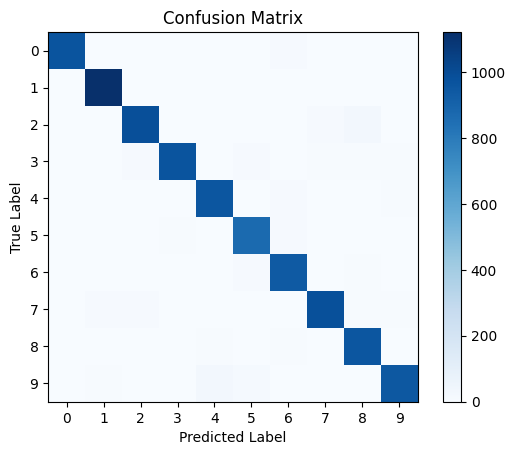

In [ ]:
# Predict classes for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert binary class matrices to class vectors
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix generated by the code I provided shows the number of correctly classified and misclassified instances for each digit class. The diagonal elements of the matrix represent the number of images that were correctly classified, while the off-diagonal elements represent the number of images that were misclassified.

In [ ]:
#Evaluate model on test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Predict classes for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert binary class matrices to class vectors
y_test_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
# Calculate precision, recall, and F1 score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Loss: 0.1067
Test Accuracy: 0.9695
Precision: 0.9699
Recall: 0.9695
F1 Score: 0.9695


In [ ]:
# Evaluate model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1067422079116106
Test accuracy: 0.9695


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0567 - acc: 0.9830 - val_loss: 0.0856 - val_acc: 0.9778
Epoch 2/10
60000/60000 [==============================] - 18s 292us/sample - loss: 0.0558 - acc: 0.9834 - val_loss: 0.0882 - val_acc: 0.9756
Epoch 3/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0577 - acc: 0.9825 - val_loss: 0.0874 - val_acc: 0.9769
Epoch 4/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0531 - acc: 0.9834 - val_loss: 0.0982 - val_acc: 0.9724
Epoch 5/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.0555 - acc: 0.9835 - val_loss: 0.0840 - val_acc: 0.9767
Epoch 6/10
60000/60000 [==============================] - 18s 296us/sample - loss: 0.0490 - acc: 0.9855 - val_loss: 0.1001 - val_acc: 0.9726
Epoch 7/10
60000/60000 [==============================] - 16s 265us/sample - loss: 0.0545 - acc: 0.9837 

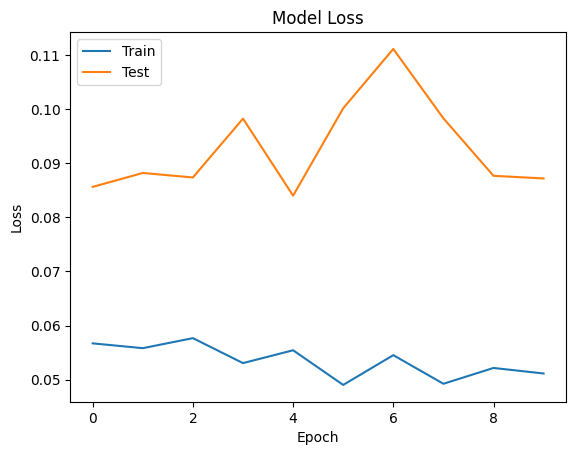

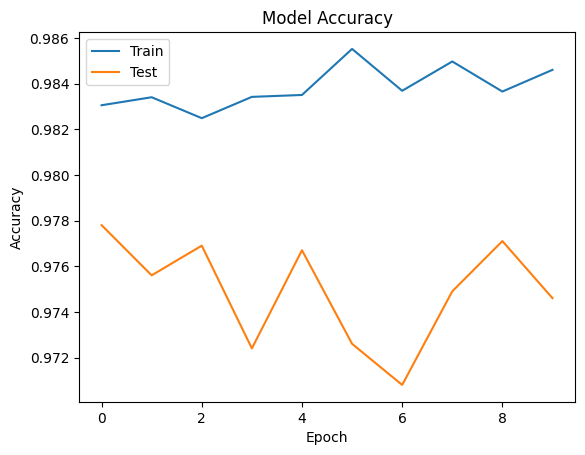

In [ ]:
# Train model and store history
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation accuracy
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
else:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()